In [1]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

In [2]:
df = pd.read_csv('DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0


In [3]:
def det_covid(x, y):
    if (y < 2020):
        return "Pre"
    elif(y == 2020 and (x >= 1 and x < 12)):
        return "During"
    else:
        return "Post"

df['Covid'] = df.apply(lambda x: det_covid(df['Month'], df['Year']))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [4]:
df = df.assign(MonthYear=df['Month'].astype(str) + '/' + df['Year'].astype(str))
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,MonthYear
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0,1/2013
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0,1/2013
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5,1/2013
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5,1/2013
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0,1/2013


In [5]:
df['Covid'] = df['Year'].apply(lambda x: "Pre" if x < 2020 else ("During" if x == 2020 else "Post"))
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,MonthYear,Covid
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0,1/2013,Pre
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0,1/2013,Pre
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5,1/2013,Pre
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5,1/2013,Pre
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0,1/2013,Pre


In [6]:
df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

Facility Class        object
Facility Location     object
Facility Code         object
Facility              object
Status                object
Reservation Type      object
Headcount            float64
BeginTimeDate         object
EndTimeDate           object
Duration Minutes       int64
Weekday                int64
Month                  int64
Year                   int64
BeginTime            float64
Covid                 object
dtype: object

In [6]:
sns.set_palette("Spectral")

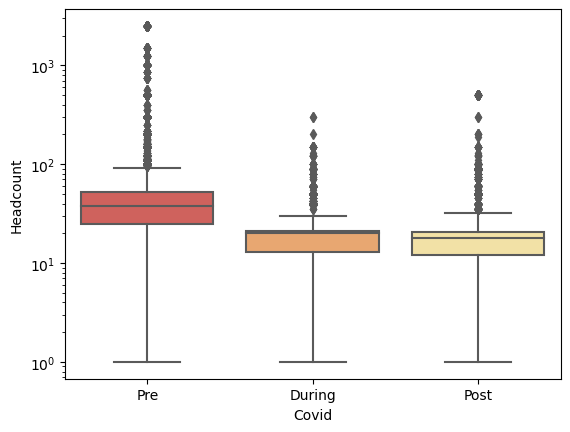

In [7]:
sns.boxplot(data=df, x='Covid', y='Headcount')
plt.yscale("log")
plt.savefig("CovidHeadcount.pdf", format="pdf", bbox_inches="tight")

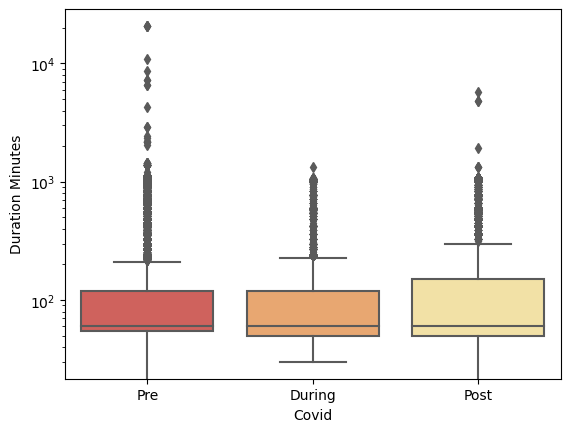

In [26]:
sns.boxplot(data=df, x='Covid', y='Duration Minutes')
plt.yscale("log")

Text(0, 0.5, 'Reservation count')

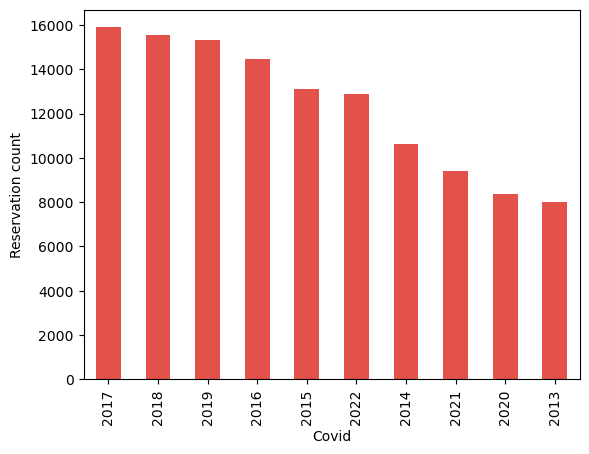

In [27]:
fig, ax = plt.subplots()
df['Year'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Covid')
ax.set_ylabel('Reservation count')

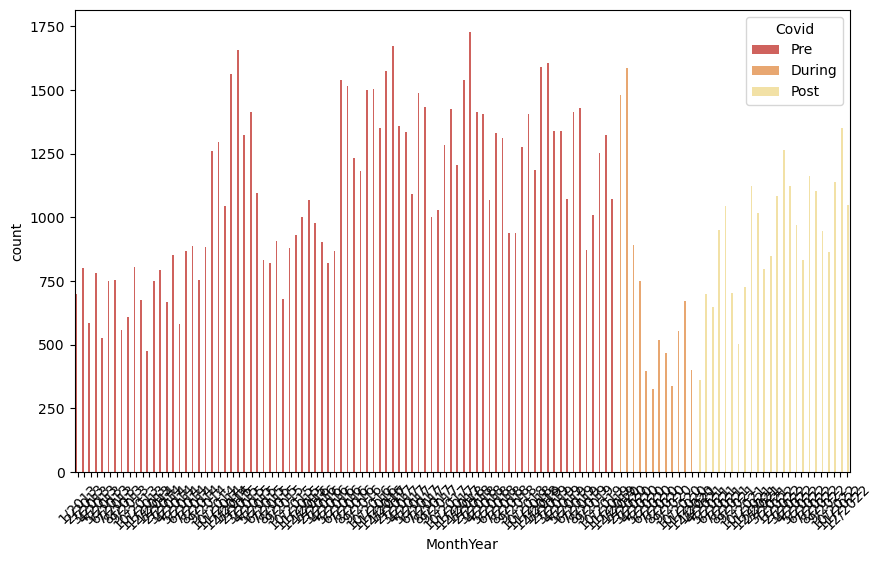

In [29]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.countplot(x='MonthYear', data=df, hue='Covid')
plt.savefig("CovidCount.pdf", format="pdf", bbox_inches="tight")

In [36]:
sns.set_palette("Set2")
#sns.set_palette("Paired")

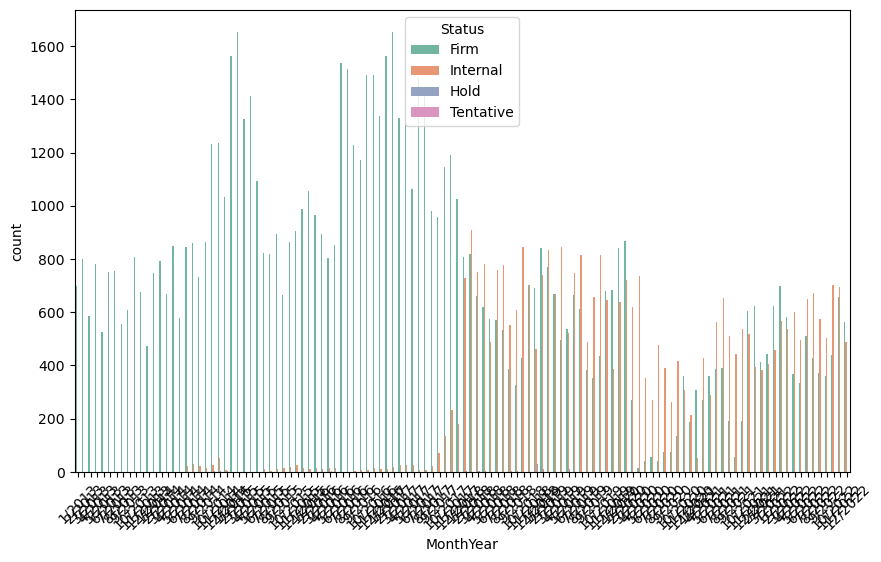

In [38]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.countplot(x='MonthYear', data=df, hue='Status')
plt.savefig("CovidStatusCount.pdf", format="pdf", bbox_inches="tight")

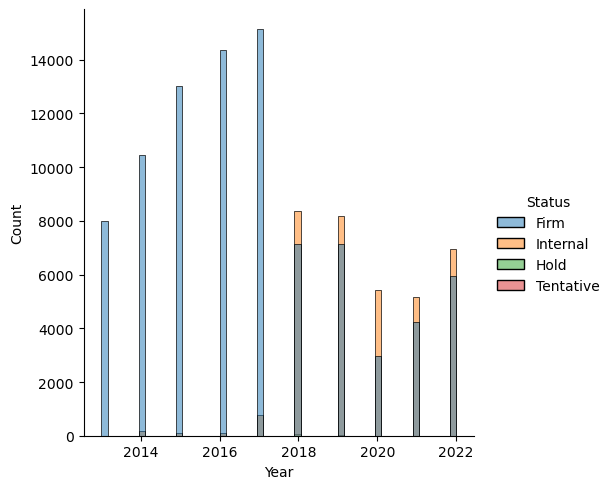

In [14]:
sns.displot(data=df, x="Year", hue="Status")